In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df.shape

(200, 5)

In [4]:
df.isnull()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

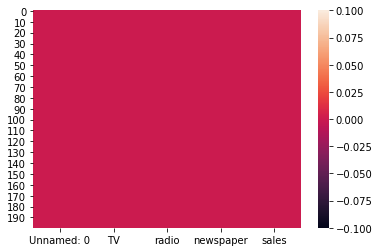

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


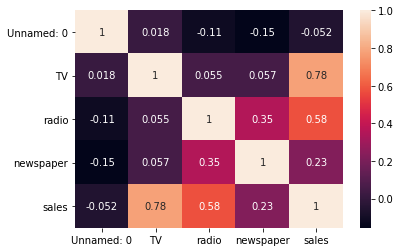

In [10]:
sns.heatmap(df.corr(),annot=True)

In [11]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [12]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [14]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

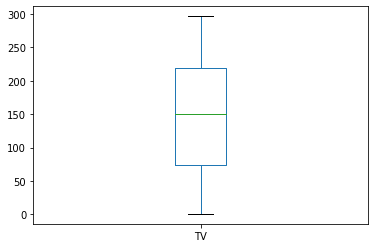

In [15]:
df['TV'].plot.box()

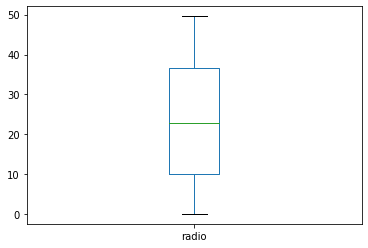

In [16]:
df['radio'].plot.box()

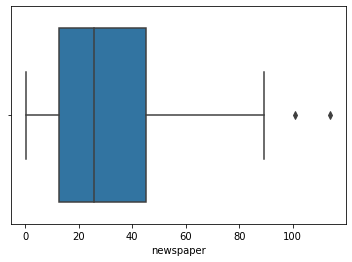

In [20]:
sns.boxplot(df['newspaper'])

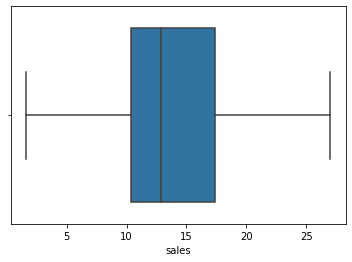

In [21]:
sns.boxplot(df['sales'])

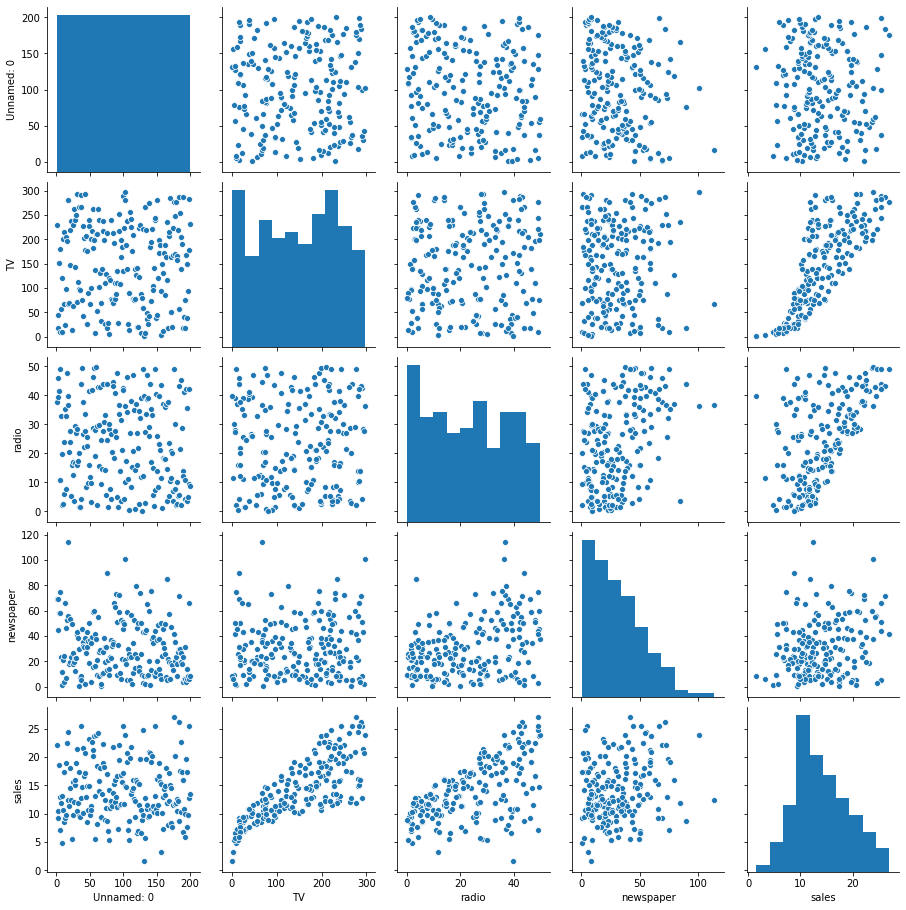

In [22]:
sns.pairplot(df)

In [23]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [25]:
for col in df.columns:
    if df.skew().loc[col]>.55:
        df[col]=np.log1p(df[col])

In [26]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper    -0.799875
sales         0.407571
dtype: float64

In [27]:
# To check the Outliers

In [28]:
from scipy.stats import zscore

In [29]:
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.27054817e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 7.84008452e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.27219508e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.07922051e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.07727442e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 1.36239293e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 5.26522686e-02,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 7.16694174e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 2.84612391e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 6.14011337e-02,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [30]:
threshold=3
np.where(z>3)

(array([33], dtype=int64), array([3], dtype=int64))

In [31]:
z[33][3]

3.344519569817156

In [32]:
df1=df[(z<3).all(axis=1)]
df1

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,4.251348,22.1
1,2,44.5,39.3,3.830813,10.4
2,3,17.2,45.9,4.252772,9.3
3,4,151.5,41.3,4.085976,18.5
4,5,180.8,10.8,4.084294,12.9
...,...,...,...,...,...
195,196,38.2,3.7,2.694627,7.6
196,197,94.2,4.9,2.208274,9.7
197,198,177.0,9.3,2.001480,12.8
198,199,283.6,42.0,4.207673,25.5


In [33]:
x=df1.iloc[:,1:4]
x

,TV,radio,newspaper
0,230.1,37.8,4.251348
1,44.5,39.3,3.830813
2,17.2,45.9,4.252772
3,151.5,41.3,4.085976
4,180.8,10.8,4.084294
...,...,...,...
195,38.2,3.7,2.694627
196,94.2,4.9,2.208274
197,177.0,9.3,2.001480
198,283.6,42.0,4.207673


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [37]:
max_r_score=0
for r_state in range(40,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    linr=LinearRegression()
    linr.fit(x_train,y_train)
    predlinr=linr.predict(x_test)
    r2score=r2_score(y_test,predlinr)
    if(r2score>max_r_score):
        max_r_score=r2score
        final_r_state=r_state
        
print("")
print('Max r2-Score corresponds to',final_r_state,'is',max_r_score)


Max r2-Score corresponds to 90 is 0.94280827688424


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=90)

In [43]:
linr.fit(x_train,y_train)
linr.score(x_train,y_train)

0.8845655674797014

In [44]:
predlinr=linr.predict(x_test)

In [45]:
print('r2-Score =',r2_score(y_test,predlinr))
print(mean_absolute_error(y_test,predlinr))
print('RMSE =',np.sqrt(mean_squared_error(y_test,predlinr)))

r2-Score = 0.94280827688424
0.9661861394478795
RMSE = 1.2069732201545373
